In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
import pandas as pd
book=pd.read_csv('extract_reviews.csv')
book

,stars,comment
0,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n I highly recommend...
1,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n I am glad that i b...
2,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n This is my 3rd pur...
3,3.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Thats the picture ...
4,1.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n It's not books. Th...
...,...,...
1015,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Perfect gift for t...
1016,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Very good quality ...
1017,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Perfect for the be...
1018,5.0 out of 5 stars,"\n\n\n\n\n\n\n\n \n \n Good quality, safe..."


In [3]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   stars    1020 non-null   object
 1   comment  1020 non-null   object
dtypes: object(2)
memory usage: 16.1+ KB


In [4]:
book.columns = ['stars', 'x']

In [5]:
book.head()

,stars,x
0,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n I highly recommend...
1,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n I am glad that i b...
2,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n This is my 3rd pur...
3,3.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Thats the picture ...
4,1.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n It's not books. Th...


In [6]:
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book[0:10]

['I highly recommend these boards books for children above 1 year. My kid is so happy flipping the pages and identifying animals, fruits etc. It is very convenient for my kid to hold it as it is of small size and he thoroughly enjoys it. I was so impressed by these books that I gifted these books to my nephew as well.',
 'I am glad that i bought this set. My baby have learned a lot from this. The size is perfect for babies though it may look small at first glance. Trust me i have tried a bigger book and it was too big so got torn within a week. My baby will read this book as soon as she got up and before going to bed everyday. Totally worth it.',
 'This is my 3rd purchase and slowly has been my default gift for kids. First birthday along with some toys. They love them and the colours are bright and the book is hard cardboard material so kids can’t tear it (for the little active kids too)',
 "Thats the picture of book colors. Now how do you expect me to teach color by this? It should ha

In [8]:
##Part Of Speech Tagging
nlp = spacy.load("en_core_web_sm")

one_block = book[2]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [9]:
one_block

'This is my 3rd purchase and slowly has been my default gift for kids. First birthday along with some toys. They love them and the colours are bright and the book is hard cardboard material so kids can’t tear it (for the little active kids too)'

In [10]:
for token in doc_block[0:10]:
    print(token, token.pos_)

This PRON
is AUX
my PRON
3rd ADJ
purchase NOUN
and CCONJ
slowly ADV
has AUX
been AUX
my PRON


In [11]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[:25])

['purchase', 'default', 'gift', 'kids', 'birthday', 'toys', 'love', 'colours', 'book', 'cardboard', 'material', 'kids', 'tear', 'kids']


In [12]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,kids,3
1,purchase,1
2,default,1
3,gift,1
4,birthday,1
5,toys,1
6,love,1
7,colours,1
8,book,1
9,cardboard,1


# Emotion mining

In [13]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [14]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [15]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(book))
sentences[5:15]

['My baby have learned a lot from this.',
 'The size is perfect for babies though it may look small at first glance.',
 'Trust me i have tried a bigger book and it was too big so got torn within a week.',
 'My baby will read this book as soon as she got up and before going to bed everyday.',
 'Totally worth it.',
 'This is my 3rd purchase and slowly has been my default gift for kids.',
 'First birthday along with some toys.',
 'They love them and the colours are bright and the book is hard cardboard material so kids can’t tear it (for the little active kids too) Thats the picture of book colors.',
 'Now how do you expect me to teach color by this?',
 'It should have had only plain color blue.']

In [16]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,I highly recommend these boards books for chil...
1,My kid is so happy flipping the pages and iden...
2,It is very convenient for my kid to hold it as...
3,I was so impressed by these books that I gifte...
4,I am glad that i bought this set.
...,...
1860,Thanku Amazon.
1861,"Good quality, safe for kids."
1862,Specially the thick pages adds to the benifit ...
1863,Good collection.


In [17]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [18]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [19]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [20]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [21]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    11
1    13
2    21
3    17
4     8
5     8
6    14
7    19
8    18
9     3
Name: word_count, dtype: int64

In [22]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
798,My kid is loving it like a candy....beautiful ...,19,47
1708,Its very much helpful for Toddlers..these book...,19,39
226,Best set of books.I have both the sets i. e. a...,21,71
1400,Nice book with good colours and good To see A ...,22,83
721,Quality of the board books are great n durable...,22,43
719,I never expected it to be so good.Would say a ...,24,65
1641,Overall a good purchase Just opened the box of...,25,39
1834,"Very good build quality is great, clear pictur...",26,65
1493,"Good Quality, Nice presentation, Helpful to ki...",26,68
1347,Nice quality and premium feel Smaller in size ...,33,105


In [23]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    1865.000000
mean        2.695442
std         3.574244
min        -7.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        33.000000
Name: sentiment_value, dtype: float64

In [26]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=-5]

,sentence,sentiment_value,word_count
19,This are pocket books.Wrong way to sell item b...,-6,35
51,Palm sized board books for babies .. easy to h...,-5,16
143,Corners are kept rounded to avoid accidental h...,-5,11
452,He can roughly use it without a worry of damage.,-6,10
715,No worry of these getting torn or damage if yo...,-7,19


In [28]:
sent_df[sent_df['sentiment_value']>=30]

,sentence,sentiment_value,word_count
1347,Nice quality and premium feel Smaller in size ...,33,105


In [29]:
sent_df['index']=range(0,len(sent_df))

C:\Users\uniha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

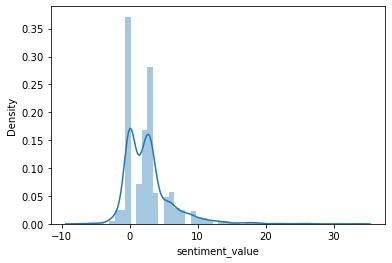

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

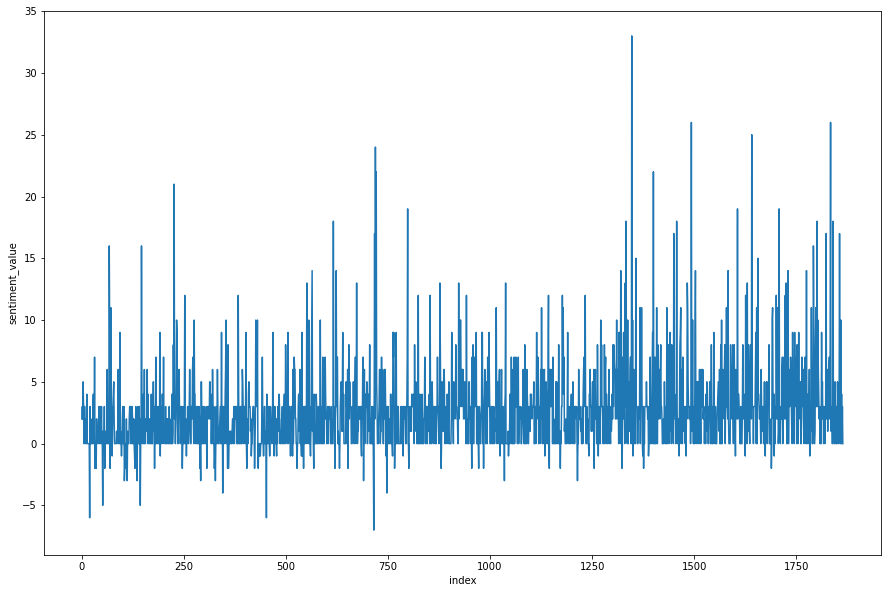

In [31]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

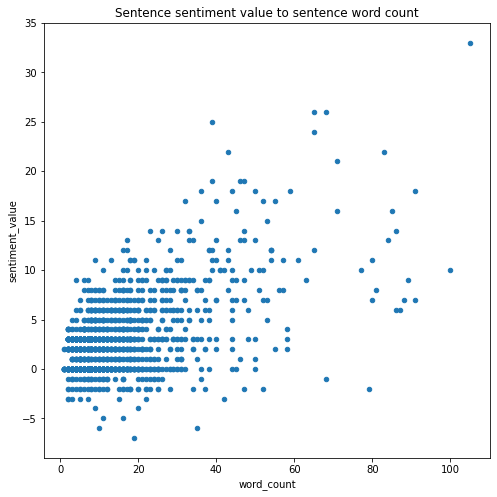

In [32]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')